In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

## Step# 1 : Reading & Understanding the given dataset

In [3]:
# loading the csv to read as pandas dataframe
df_bikes = pd.read_csv("day.csv")

In [4]:
# check top 5 rows of the given bikes sharing usecase dataset 
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the dimension (rows x columns) of the dataset
df_bikes.shape

(730, 16)

There are total of 730 rows and 16 columns in the given dataset

In [7]:
#checking the column data types
df_bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# renaming few columns for better readibility

df_bikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [9]:
# Check the descriptive information
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Lets check the basic stats
df_bikes.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step# 2 : Data Quality Checks

### Check for Null Values

In [13]:
# checking the null values percentage for each column in the data set 
round((df_bikes.isnull().sum()/len(df_bikes))*100,2)

instant       0.0
dteday        0.0
season        0.0
year          0.0
month         0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Check for columns with only one unique value

In [15]:
single_value_col_list = [ i for i in df_bikes.columns if df_bikes[i].nunique() == 1]

In [16]:
print(single_value_col_list)

[]


### Check for duplicate values

In [18]:
# checking if we have duplicate rows in dataset 
df_bikes[df_bikes.duplicated()]

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt


## Step# 3 : Data Cleaning

### Dropping the redundant & columns which are not reuired for analysis

In [21]:
df_bikes.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

As per the given data dictionary

- instant: record index
- dteday : date (already year & month columns present)
- casual: count of casual users
-  registered: count of registered user

casual & registered are counted under cnts

In [23]:
df_bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [24]:
df_bikes.shape

(730, 12)

In [25]:
# Mapping the season column
df_bikes.season = df_bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [27]:
# Mapping the weekday column
df_bikes.weekday = df_bikes.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [28]:
# Mapping the weathersit column
df_bikes.weathersit = df_bikes.weathersit.map({1:'Clear',2:'Misty',3:'Light_Snow',4:'Heavy_Rain'})

In [29]:
df_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step# 4: Exploratory Data Analysis

### Uni-variate Analysis

In [32]:
df_bikes.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [33]:
df_bikes.nunique() 

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

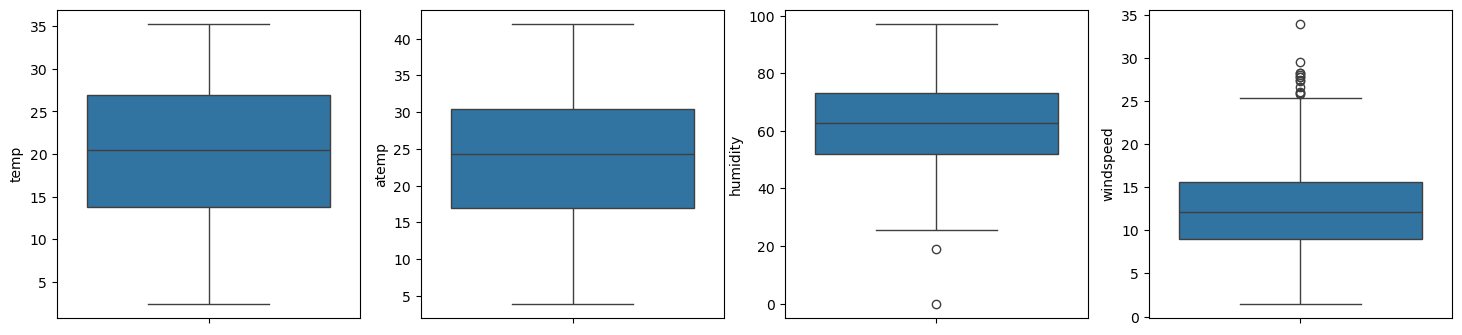

In [34]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_bikes)
    i+=1

**Insights**
- Box plot shows all the numeric variables doesn't have any outliers

### Bi-variate Analysis

In [37]:
# function to create barplot related to categorical columns

def draw_box_plot(input_col):
    plt.figure(figsize = (12,4))
    sns.boxplot(x=input_col, y='cnt', data=df_bikes)
    plt.title('Box Plot for : {0} '.format(input_col.name),fontsize=8)
    plt.xlabel(input_col.name,fontsize=8)
    plt.tight_layout()
    plt.show()



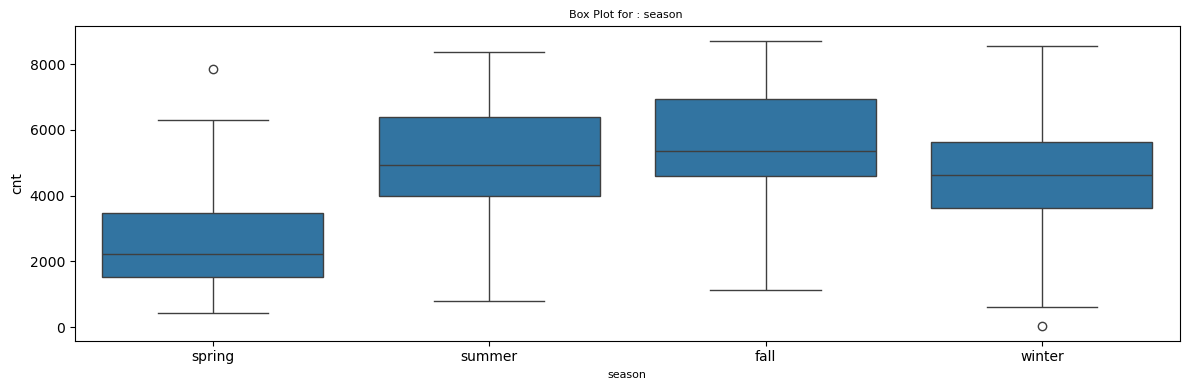

In [38]:
draw_box_plot(df_bikes['season'])

**Insight for categorical variable : season**

- Majority of the bike bookings were happened in Seasjon3:fall. This was followed by summer and winter seasons

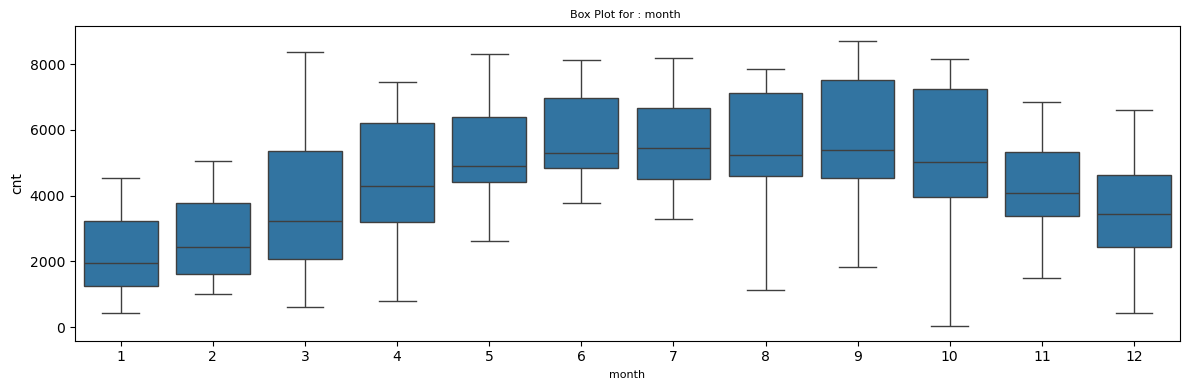

In [40]:
draw_box_plot(df_bikes['month'])

**Insight for categorical variable : month**
- Majority of the bike booking were happened in the months of May,Jun,Jul,Aug & Sep with a median of over 4000 booking per month. 

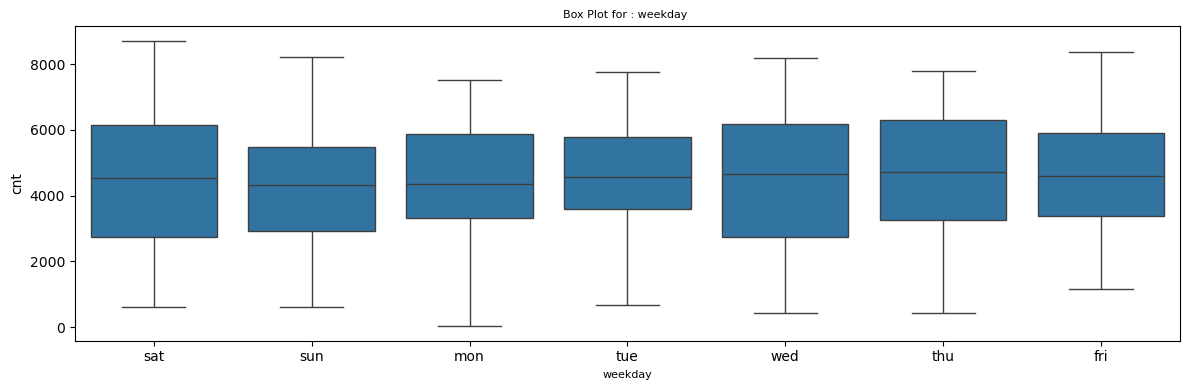

In [42]:
draw_box_plot(df_bikes['weekday'])

**Insight for categorical variable : weekday**
- weekday variable shows almost similar trend for all the days having their independent medians between 4000 to 5000 bookings. 

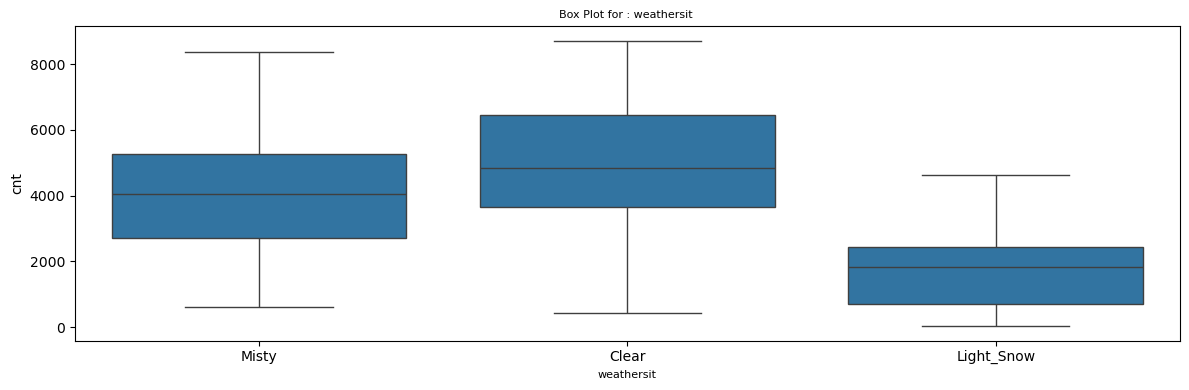

In [44]:
draw_box_plot(df_bikes['weathersit'])

**Insight for categorical variable : weathersit**
- Majority the bike booking were happened during ‘Clear' with a median of close to 5000 bookings. This was followed by Misty with 30% of total booking. 

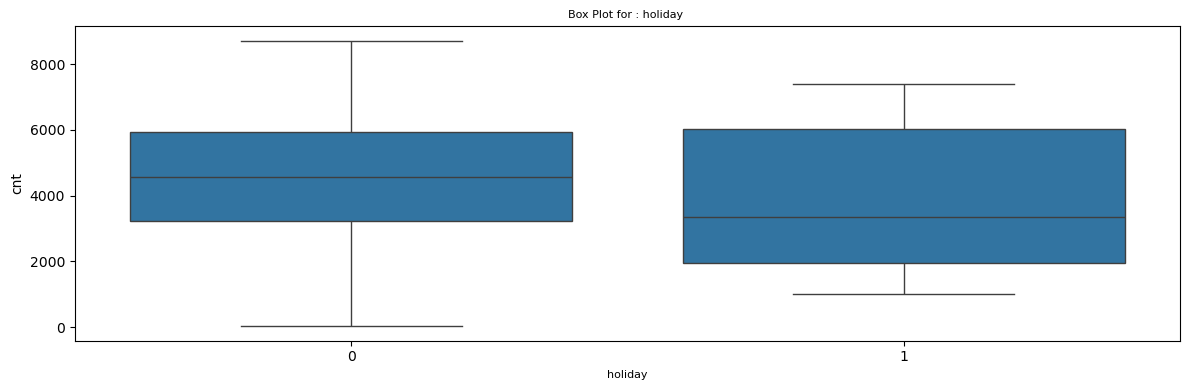

In [46]:
draw_box_plot(df_bikes['holiday'])

**Insight for categorical variable : holiday**
- Majority of the bike booking were happened when it is not a holiday based on the median of bookings

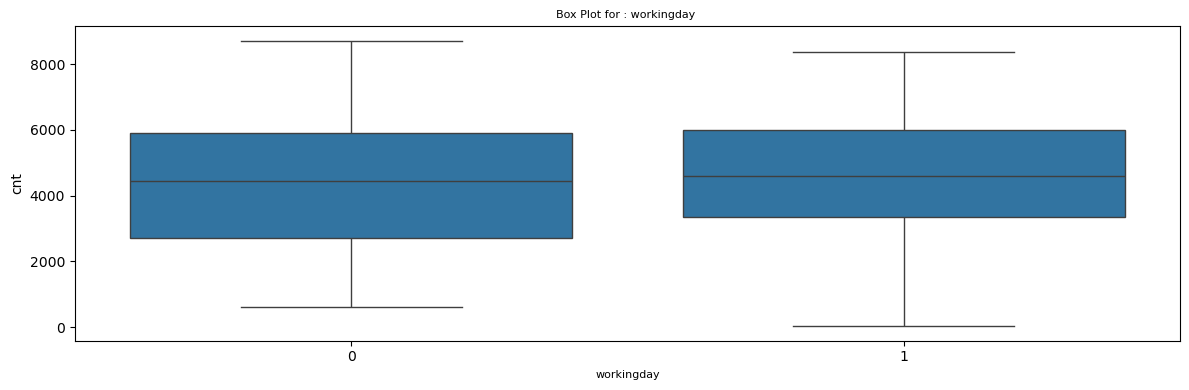

In [48]:
draw_box_plot(df_bikes['workingday'])

**Insight for categorical variable : workingday**
-  Approx 70% of the bike booking were happened on ‘workingday’ with a median of close to 5000 booking

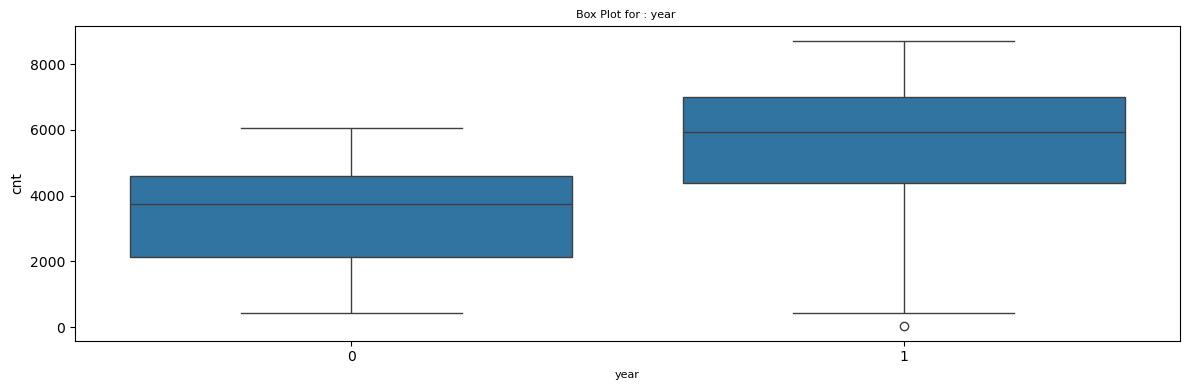

In [50]:
draw_box_plot(df_bikes['year'])

**Insight for categorical variable : year**
- Year 2018 has average bookings of approx 3800
- Year 2019 has average bookings of approx 6000

In [52]:
# function to create barplot related to categorical columns

def draw_bar_plot(input_col):
    plt.figure(figsize = (10,6))
    sns.barplot(x=input_col, y='cnt', data=df_bikes, hue='year',palette='Set2')
    plt.title('Box Plot for : {0} '.format(input_col.name),fontsize=8)
    plt.xlabel(input_col.name,fontsize=8)
    plt.tight_layout()
    plt.show()


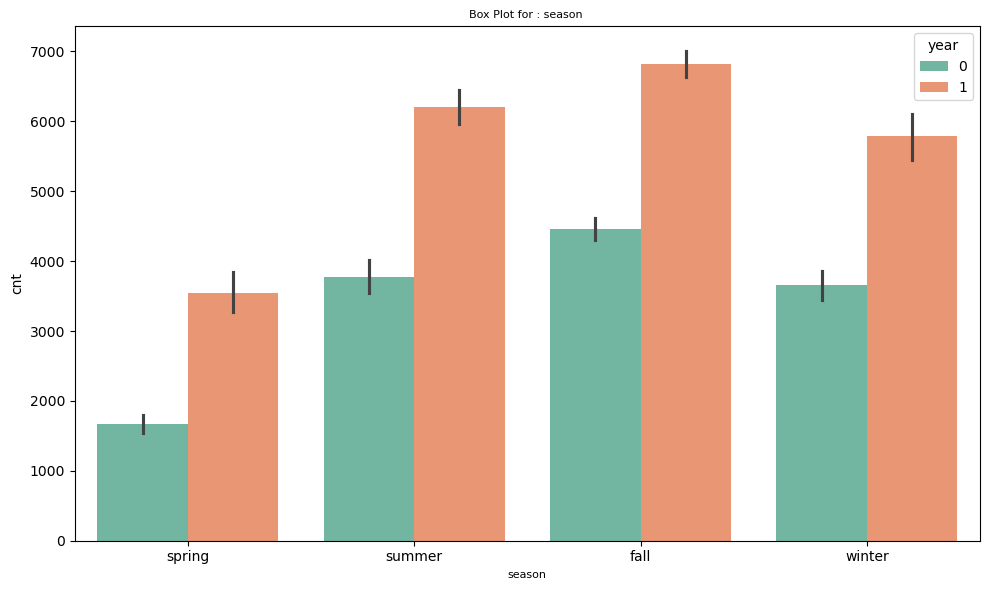

In [53]:
draw_bar_plot(df_bikes['season'])

**Insights**
- In Year 2018 major bookings happened in fall season followed by summer and winter seasons where as spring season shows less bookings
- In Year 2019 also major bookings happened in fall seasons followed by summer and winter seasons where as spring season shows less bookings

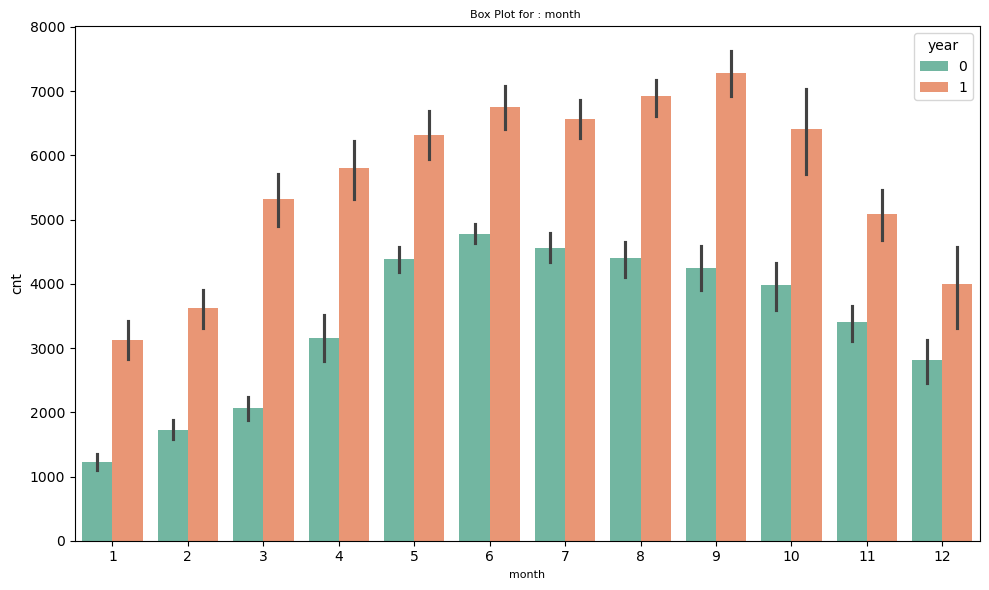

In [55]:
draw_bar_plot(df_bikes['month'])

**Insights**
- In both Years 2018 & 2019, majority of bookings happened during may-sep months

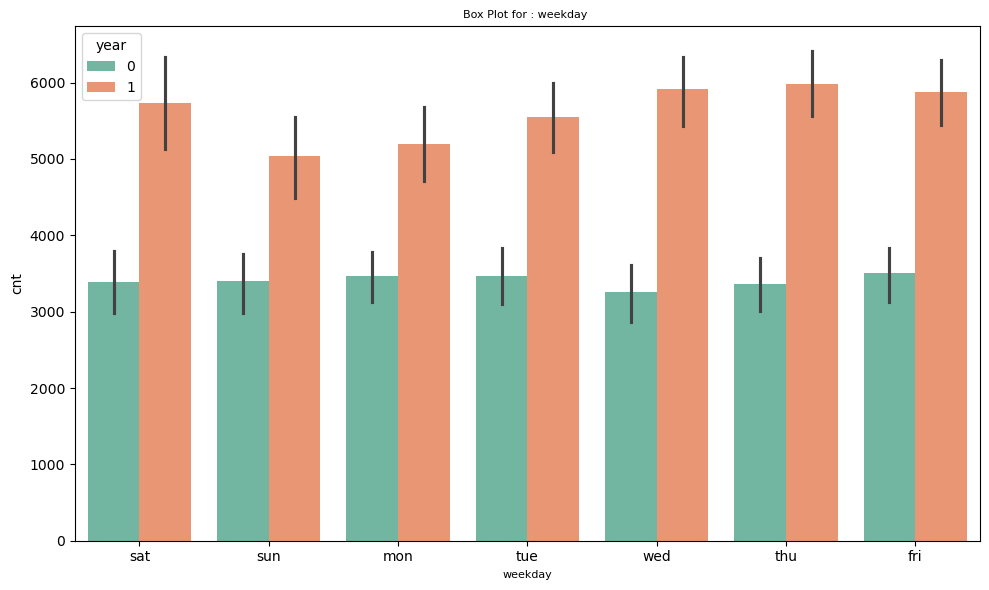

In [57]:
draw_bar_plot(df_bikes['weekday'])

**Insights**
- In the Year 2018 bookings were almost same on every day
- In the Year 2019 bookings were slightly less on sunday & monday compared to other days

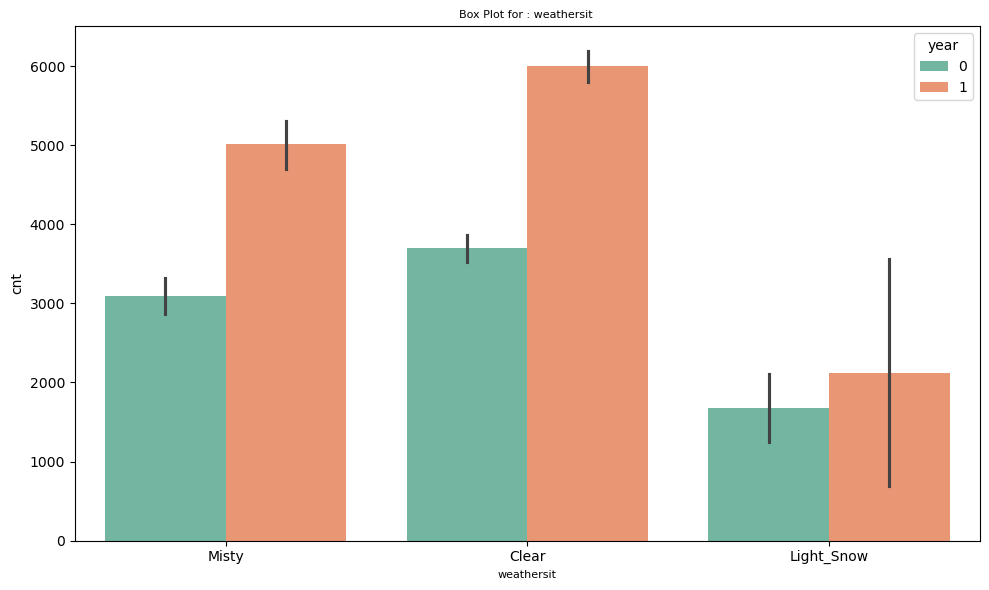

In [59]:
draw_bar_plot(df_bikes['weathersit'])

**Insights**
- In both the years 2018 & 2019 bookings were more in weathersit Clear season followed by Misty.

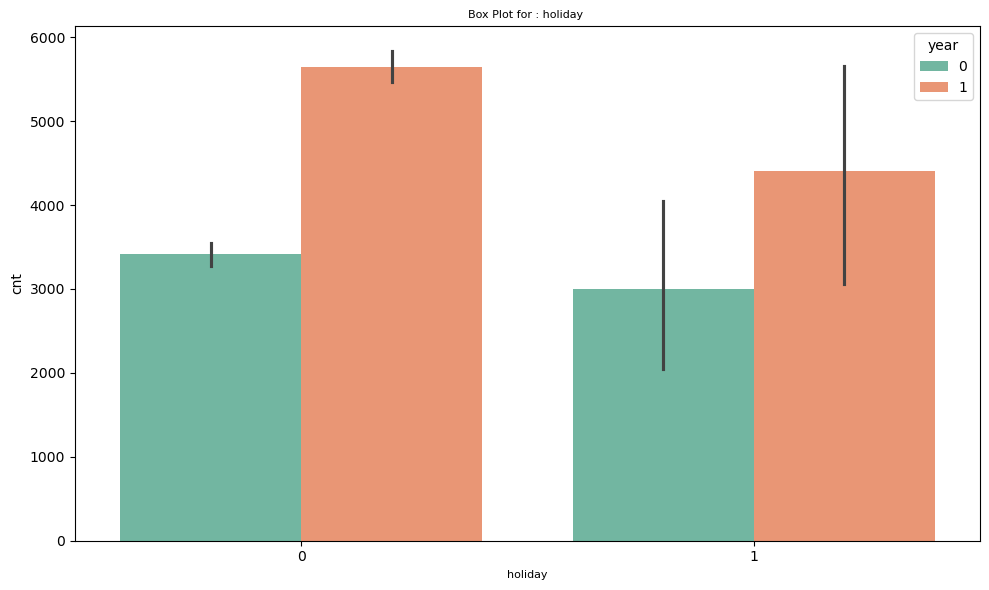

In [61]:
draw_bar_plot(df_bikes['holiday'])

**Insights**
- In the year 2018, bookings were almost same on both holiday and not holiday
- In the year 2019, bookings were more on non holiday compared to holiday

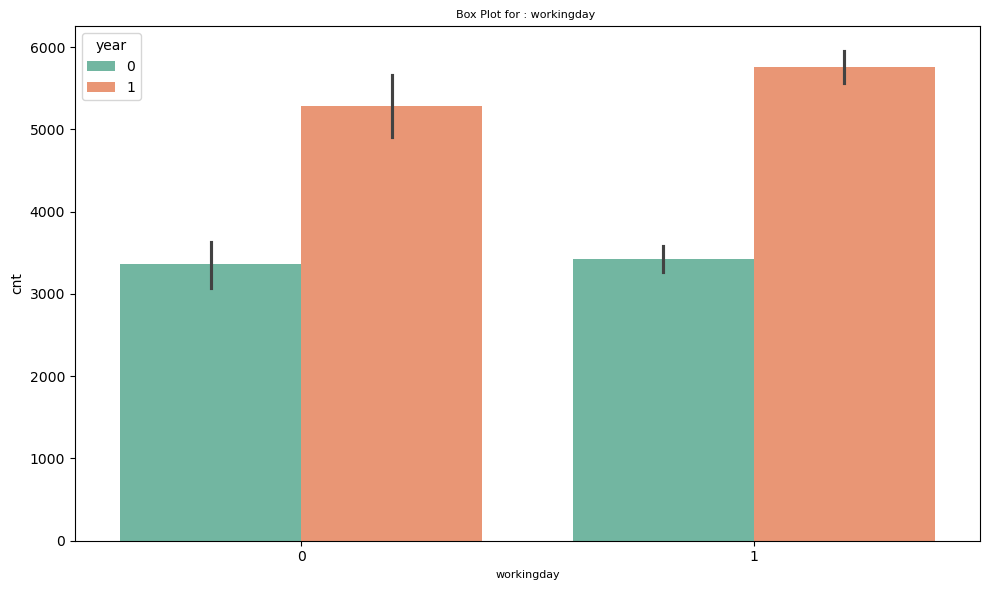

In [63]:
draw_bar_plot(df_bikes['workingday'])

**Insights**
- Year 2018 shows bookings were same on both working day and not working day
- Year 2019 shows bookings were little more on working day

### Draw Pairplot to check linear relationship

<Figure size 1500x3000 with 0 Axes>

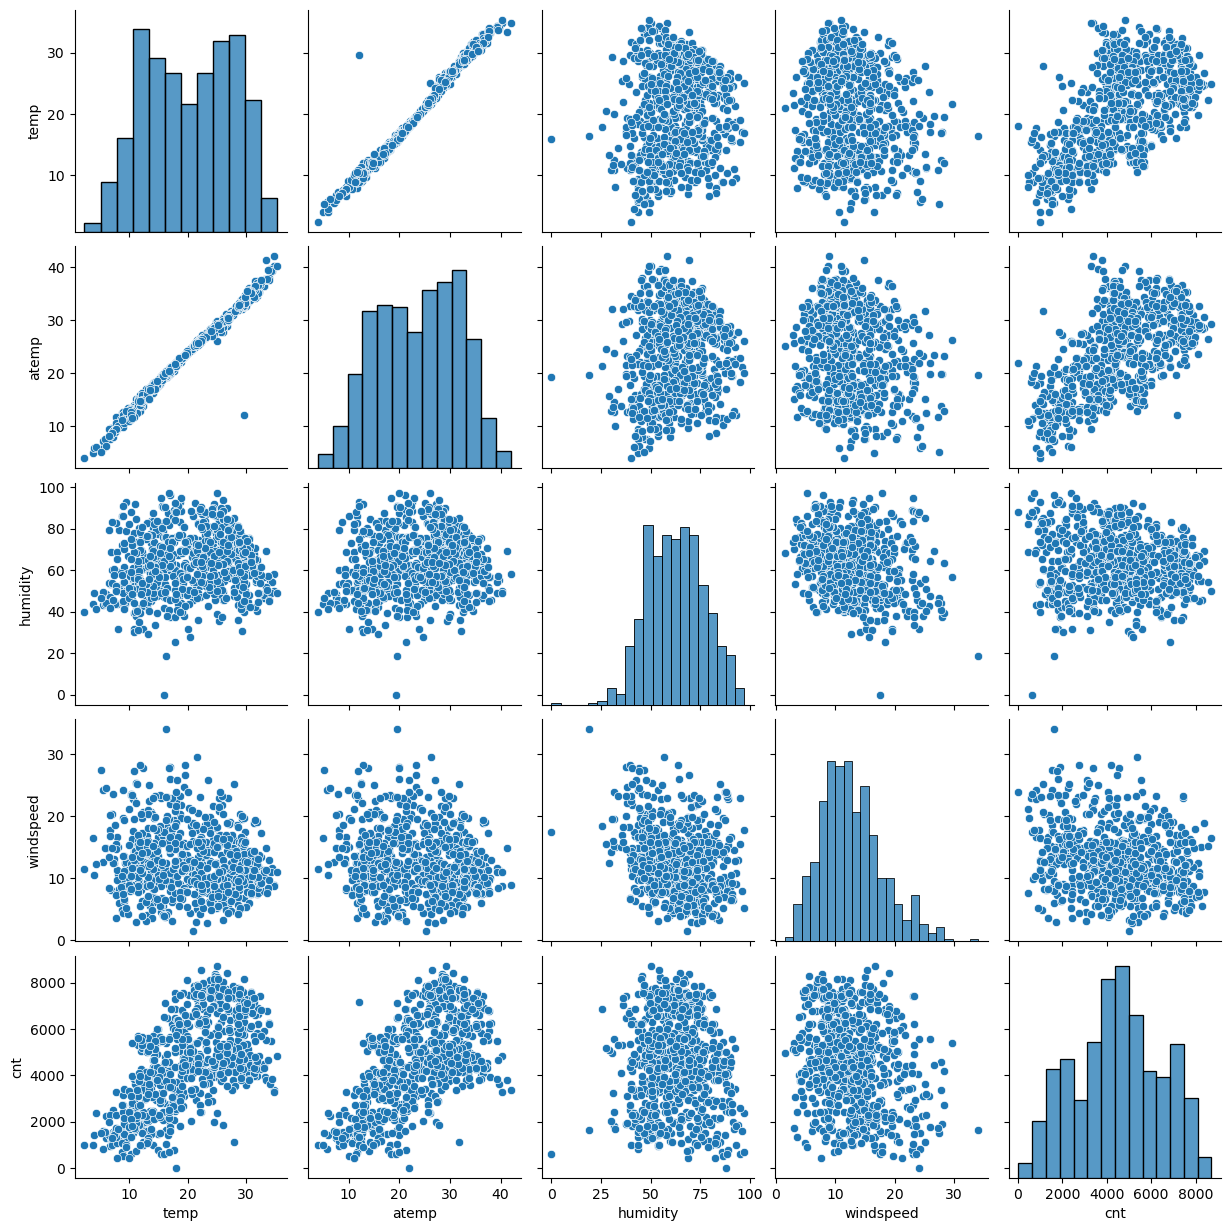

In [66]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bikes,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

**Insights**
- There is linear relationship between temp and atemp. 

### Correlation Matrix

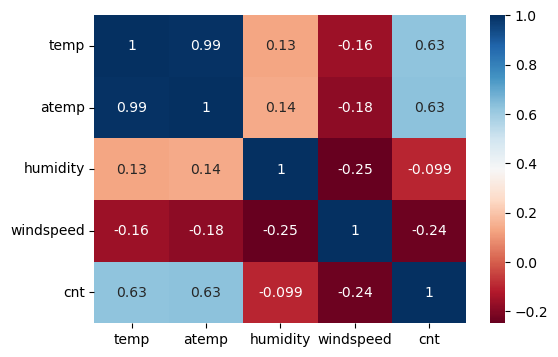

In [69]:
plt.figure(figsize = (6,4))
sns.heatmap(df_bikes[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdBu")
plt.show()

### Creating the dummy variables

In [71]:
df_bikes = pd.get_dummies(data=df_bikes,columns=["season","month","weekday"],drop_first=True)
df_bikes = pd.get_dummies(data=df_bikes,columns=["weathersit"])

## Step# 5 : Splitting the Data into Training and Testing Data Sets

In [73]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_bikes, train_size = 0.7, random_state = 120)

In [74]:
# check the shape of training datatset

df_train.shape

(510, 31)

In [75]:
# check the shape of testing datatset

df_test.shape

(220, 31)

## Step# 6 : Rescaling the Features

In [77]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [78]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
629,1,0,0,26.650000,30.52440,64.6667,19.000061,8395,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
503,1,0,0,24.600000,28.34540,45.6250,5.626325,8294,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
81,0,0,1,14.225237,16.89695,83.9565,15.695487,2121,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
709,1,0,1,14.486653,16.91815,59.6667,19.834479,5501,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
695,1,0,1,11.958347,14.07790,78.6667,15.916654,3959,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True


In [79]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [80]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
629,1,0,0,0.736253,0.711117,0.671862,0.623114,0.981249,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
503,1,0,0,0.673950,0.652800,0.474026,0.146917,0.969413,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
81,0,0,1,0.358646,0.346406,0.872275,0.505448,0.245986,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
709,1,0,1,0.366591,0.346973,0.619914,0.652825,0.642095,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
695,1,0,1,0.289752,0.270959,0.817316,0.513323,0.461385,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True


In [81]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.027451,0.690196,0.539027,0.524028,0.651173,0.397092,0.520712
std,0.500395,0.163554,0.462867,0.230096,0.219934,0.147588,0.185187,0.226859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.330095,0.540801,0.259630,0.366167
50%,0.000000,0.000000,1.000000,0.542596,0.535793,0.651515,0.370175,0.528302
75%,1.000000,0.000000,1.000000,0.740406,0.704995,0.754654,0.502957,0.674147
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step# 7 : Building the Linear Model

In [83]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [84]:
# Recursive feature elimination 

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [85]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('month_2', False, 7),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 16),
 ('month_8', False, 3),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 8),
 ('month_12', False, 13),
 ('weekday_mon', False, 10),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 15),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Misty', False, 6)]

In [86]:
#Function to build a model using statsmodel api with inputs as X_train & y_train
def build_linear_model(X_train_rfe,y_train):
    X_train_sm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    return lm

In [87]:
#Function to calculate VIFs 
def calculate_vif(X_train_rfe):
    df1 = X_train_rfe.astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    return vif.sort_values(by='VIF',ascending=False)

In [88]:
#Print Columns selected by RFE. We will manually eliminate for these columns
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_3', 'month_4', 'month_5', 'month_6', 'month_9',
       'month_10', 'weathersit_Clear', 'weathersit_Light_Snow'],
      dtype='object')

In [89]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_summer', 'month_2', 'month_7', 'month_8',
       'month_11', 'month_12', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_Misty'],
      dtype='object')

### Building Linear Model using Stats Model

### Building Linear Model 1

In [92]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[rfe_cols]

In [93]:
X_train_rfe.shape

(510, 15)

In [94]:
#Selected columns for Model 1 - all columns selected by RFE
X_train_lmd1 = X_train_rfe
lr1 = build_linear_model(X_train_lmd1,y_train)
print(lr1.summary())
vif1 = calculate_vif(X_train_lmd1)
print(vif1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.37e-184
Time:                        12:27:28   Log-Likelihood:                 498.58
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     494   BIC:                            -897.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

### Building Linear Model 2

In [96]:
# As "humidity" variable shows high VIF value, it is insignificant, hence we can drop it
X_train_lmd2 = X_train_lmd1.drop(['humidity'], axis = 1)

# Build Linear Model & calculate VIF with latest X_train dataset
lr2=build_linear_model(X_train_lmd2,y_train)
print(lr2.summary())
vif2=calculate_vif(X_train_lmd2)
print(vif2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.09e-182
Time:                        12:27:28   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -949.5
Df Residuals:                     495   BIC:                            -886.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

### Building Linear Model 3

In [98]:
# As "month_4" shows high p-value >= 0.05 values hence we can drop it
X_train_lmd3 = X_train_lmd2.drop(['month_4'], axis = 1)

# Build Linear Model & calculate VIF with latest X_train dataset
lr3=build_linear_model(X_train_lmd3,y_train)
print(lr3.summary())
vif3=calculate_vif(X_train_lmd3)
print(vif3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.29e-182
Time:                        12:27:28   Log-Likelihood:                 487.83
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     496   BIC:                            -888.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

###  Building Linear Model 4

In [100]:
# As "month_6" shows  high p-value >= 0.05 values hence we can drop it
X_train_lmd4 = X_train_lmd3.drop(['month_6'], axis = 1)

# Build Linear Model & calculate VIF with latest X_train dataset
lr4=build_linear_model(X_train_lmd4,y_train)
print(lr4.summary())
vif4=calculate_vif(X_train_lmd4)
print(vif4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          8.49e-183
Time:                        12:27:28   Log-Likelihood:                 486.09
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     497   BIC:                            -891.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

### Building Linear Model 5

In [102]:
# As "season_winter" shows high  p-values hence we can drop it
X_train_lmd5 = X_train_lmd4.drop(['season_winter'], axis = 1)

# Build Linear Model & calculate VIF with latest X_train dataset
lr5=build_linear_model(X_train_lmd5,y_train)
print(lr5.summary())
vif5=calculate_vif(X_train_lmd5)
print(vif5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.1
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.17e-183
Time:                        12:27:28   Log-Likelihood:                 484.30
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     498   BIC:                            -893.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

### Building Linear Model 6

In [104]:
# As "month_5" shows high  p-values hence we can drop it
X_train_lmd6 = X_train_lmd5.drop(['month_5'], axis = 1)

# Build Linear Model & calculate VIF with latest X_train dataset
lr6=build_linear_model(X_train_lmd6,y_train)
print(lr6.summary())
vif6=calculate_vif(X_train_lmd6)
print(vif6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.37e-184
Time:                        12:27:28   Log-Likelihood:                 482.71
No. Observations:                 510   AIC:                            -943.4
Df Residuals:                     499   BIC:                            -896.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

This could be considered as final model as :
- VIF of all variables <=5
- p-values of all variables <=0.05
- R2 score & Adjusted R2 scores are also above 80

This can be considered as good model

## Step# 8: Residual Analysis

In [106]:
X_train_lmd6

,year,holiday,temp,windspeed,season_spring,month_3,month_9,month_10,weathersit_Clear,weathersit_Light_Snow
629,1,0,0.736253,0.623114,False,False,True,False,True,False
503,1,0,0.673950,0.146917,False,False,False,False,True,False
81,0,0,0.358646,0.505448,False,True,False,False,False,False
709,1,0,0.366591,0.652825,False,False,False,False,False,False
695,1,0,0.289752,0.513323,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
559,1,0,0.802708,0.289350,False,False,False,False,False,False
10,0,0,0.137016,0.237946,True,False,False,False,False,False
382,1,0,0.304288,0.937653,True,False,False,False,True,False
158,0,0,0.893047,0.272980,False,False,False,False,True,False


In [107]:
X_train_new = sm.add_constant(X_train_lmd6)
y_train_pred = lr6.predict(X_train_new)

In [108]:
residual = y_train - y_train_pred

### Error Terms

Text(0.5, 0, 'Errors')

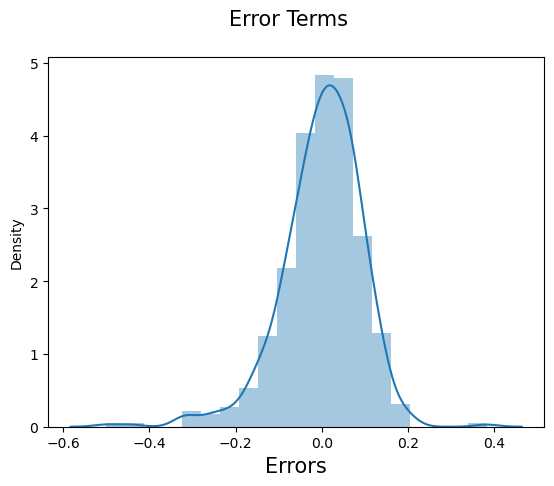

In [110]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 15 ) 
plt.xlabel('Errors', fontsize = 15)

**Insight**
- From the above histogram, we could see that the Residuals are normally distributed.

### Homoscedasticity

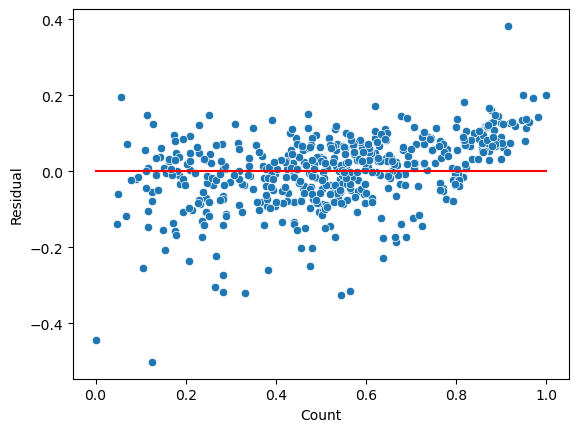

In [112]:
sns.scatterplot(x=y_train,y=residual)
sns.lineplot(x=[0,1],y=[0,0],color='red')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Multi Colinearity

In [114]:
X_train_final = X_train_lmd6
calculate_vif(X_train_final)

,Features,VIF
2,temp,4.84
3,windspeed,4.40
8,weathersit_Clear,2.78
0,year,1.92
4,season_spring,1.74
5,month_3,1.23
6,month_9,1.16
7,month_10,1.12
9,weathersit_Light_Snow,1.11
1,holiday,1.04


**From the above specified final model VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5**

### Linearity

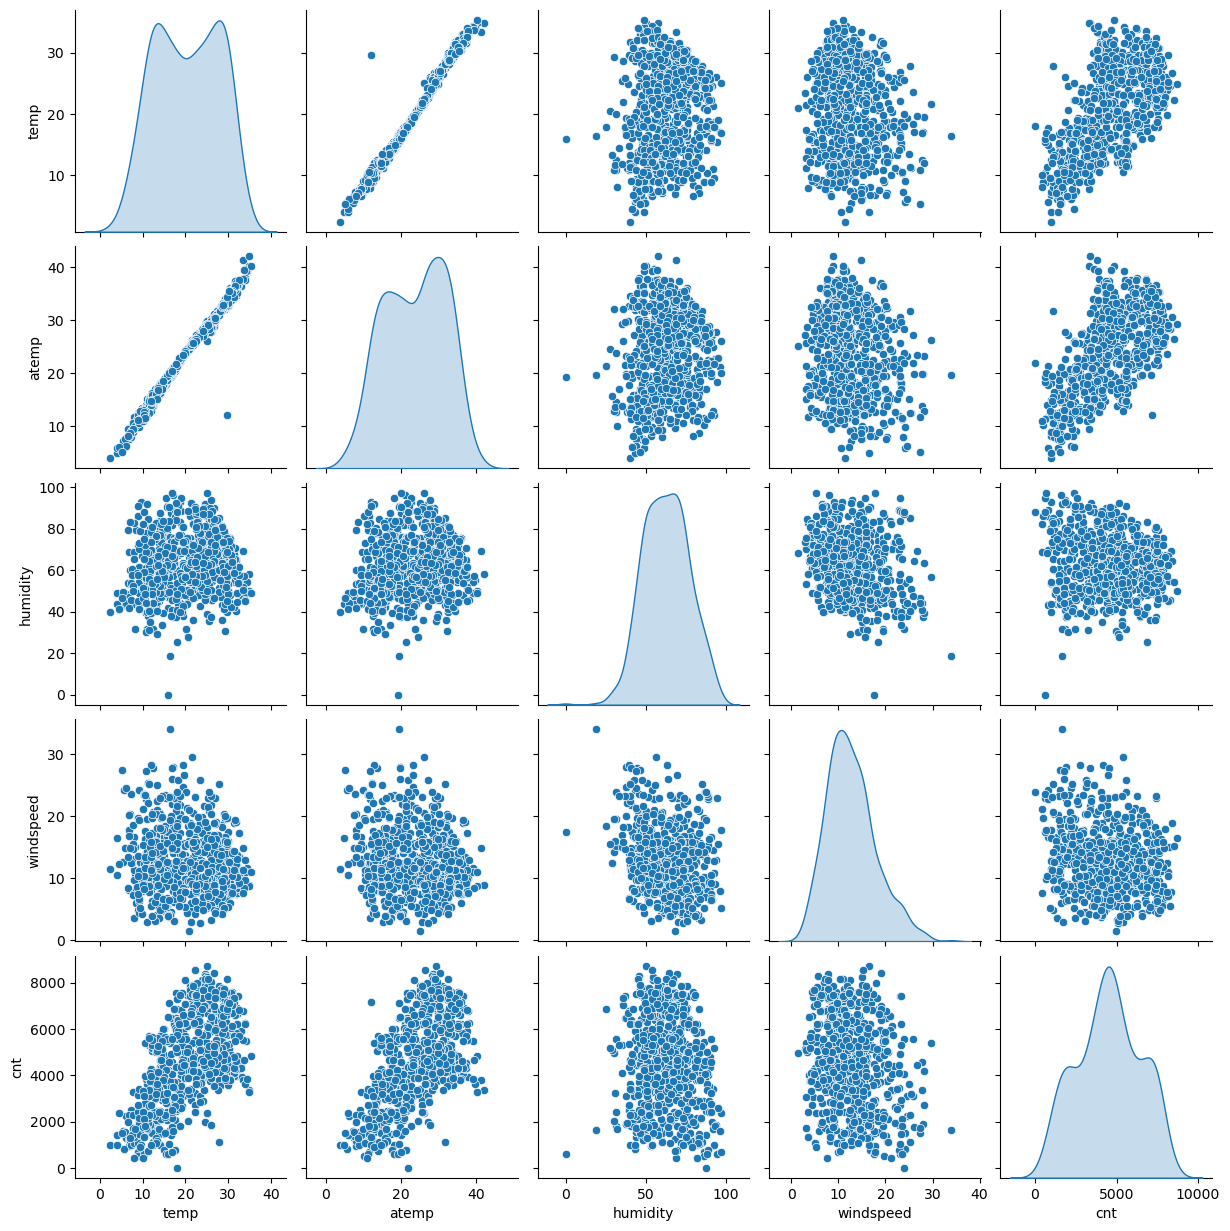

In [117]:
sns.pairplot(df_bikes[[ 'temp', 'atemp', 'humidity', 'windspeed','cnt']], diag_kind='kde')
plt.show()

### Auto Correlation

- The Durbin Watson statistic is a test for autocorrelation in a regression model’s output.
- The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation.
- Values below 2.0 mean there is positive autocorrelation and above 2.0 indicate negative autocorrelation.

**Durbin-Watson value of final model lr6 is 2.027, which signifies there is no autocorrelation.**

## Step# 9: Predictions

In [122]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [123]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
49,0,0,0,0.423702,0.417950,0.195238,1.157215,0.189031,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
611,1,0,1,0.830744,0.813351,0.784416,0.510362,0.801828,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
547,1,0,1,0.900316,0.833624,0.464502,0.412422,0.727177,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
432,1,0,1,0.438239,0.425549,0.422943,0.936153,0.532872,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
489,1,0,0,0.700948,0.676485,0.786148,0.311568,0.804055,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [124]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.522727,0.031818,0.668182,0.555037,0.541122,0.654268,0.410238,0.537343
std,0.500622,0.175916,0.471940,0.223659,0.213895,0.149012,0.184684,0.227037
min,0.000000,0.000000,0.000000,0.046591,0.026455,0.195238,0.047504,0.070901
25%,0.000000,0.000000,0.000000,0.369966,0.367477,0.539935,0.284867,0.375308
50%,1.000000,0.000000,1.000000,0.554537,0.552701,0.649351,0.389449,0.534454
75%,1.000000,0.000000,1.000000,0.758058,0.721683,0.764610,0.503689,0.727587
max,1.000000,1.000000,1.000000,0.983385,1.019437,1.010390,1.157215,1.018634


In [125]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 49 to 557
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   220 non-null    int64  
 1   holiday                220 non-null    int64  
 2   workingday             220 non-null    int64  
 3   temp                   220 non-null    float64
 4   atemp                  220 non-null    float64
 5   humidity               220 non-null    float64
 6   windspeed              220 non-null    float64
 7   season_spring          220 non-null    bool   
 8   season_summer          220 non-null    bool   
 9   season_winter          220 non-null    bool   
 10  month_2                220 non-null    bool   
 11  month_3                220 non-null    bool   
 12  month_4                220 non-null    bool   
 13  month_5                220 non-null    bool   
 14  month_6                220 non-null    bool   
 15  month_7   

In [126]:
#Selecting the variables that were part of final model.
col_list=X_train_final.columns
X_test=X_test[col_list]
# Adding constant variable to test dataframe
X_test_lmd6 = sm.add_constant(X_test)
X_test_lmd6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 49 to 557
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  220 non-null    float64
 1   year                   220 non-null    int64  
 2   holiday                220 non-null    int64  
 3   temp                   220 non-null    float64
 4   windspeed              220 non-null    float64
 5   season_spring          220 non-null    bool   
 6   month_3                220 non-null    bool   
 7   month_9                220 non-null    bool   
 8   month_10               220 non-null    bool   
 9   weathersit_Clear       220 non-null    bool   
 10  weathersit_Light_Snow  220 non-null    bool   
dtypes: bool(6), float64(3), int64(2)
memory usage: 11.6 KB


In [127]:
# Making predictions using the final model (lr6)

y_test_pred = lr6.predict(X_test_lmd6)

## Step# 10 : Model Evaluation

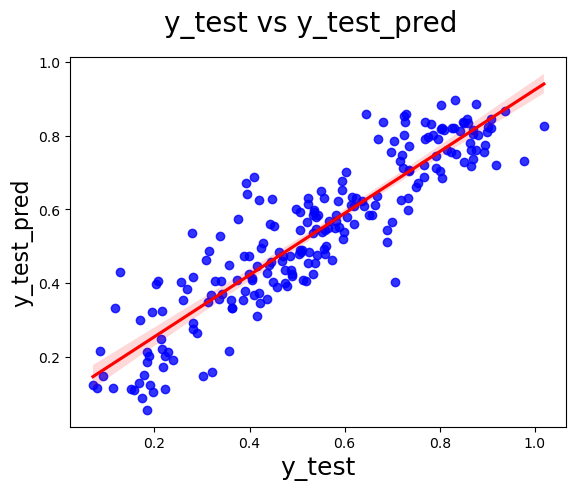

In [129]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred.astype(float),fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

### R2 value for test dataset

In [131]:
r2_score(y_test, y_test_pred)

0.8184912995404486

In [132]:
r2=0.8184912995404486

### Adjusted R2 value for test dataset

In [134]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8098066727242021

## Step# 11: Final Insights

- R2 Score for Train dataset : 82.8
- Adjusted R2 Score for Train dataset: 82.5
- R2 Score for Test dataset : 81.8
- Adjusted R2 Score for Test dataset: 80.9
- p-values of all the variables of final model <= 0.05
- Highest VIF of final model <= 5
- Durbin-Watson: 2.027
- Top3 predictor variables: temp, year, windspeed

The Linear Regression equation of best fitted line is : 

cnt = 0.2135+0.2380*year-0.1072*holiday+0.3691*temp-0.0840*windspeed-0.1597*season_spring+0.0499*month_3+0.0801*month_9+0.0948*month_10+0.0875*weathersit_Clear-0.2099*weathersit_Light_Snow